In [3]:
# installing dependencies 
!pip install pandas numpy matplotlib

### 1. Data Visualization

In [4]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('data/Salary_Data.csv')

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Axes: >

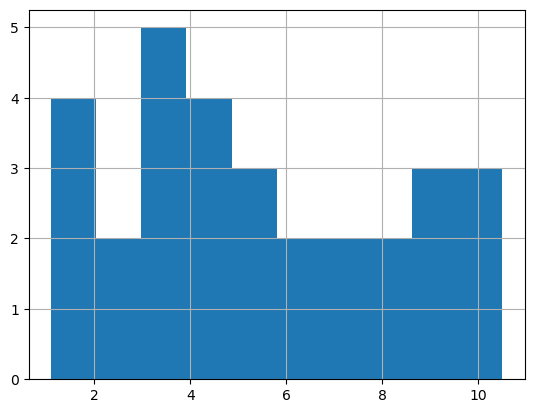

In [7]:
# histogram of YearsExperience
df['YearsExperience'].hist()

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

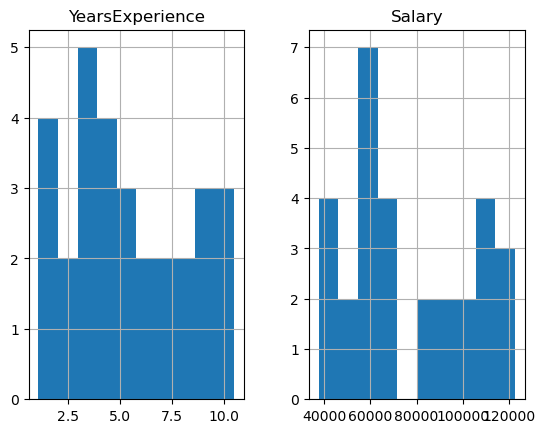

In [8]:
# histogram of Salary
df.hist()

In [9]:
df_2 = pd.read_csv("data/china_gdp.csv")

In [10]:
df_2.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Value'}>]], dtype=object)

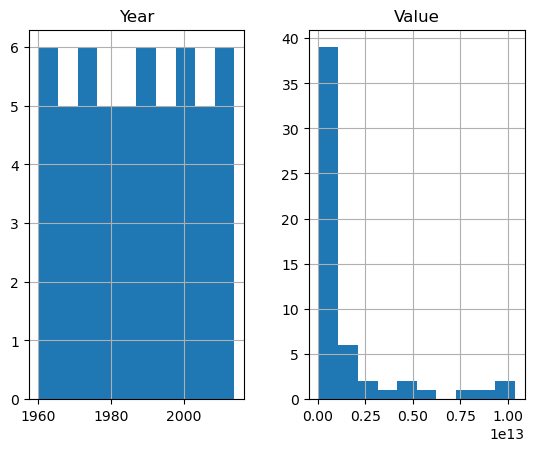

In [11]:
df_2.hist()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Value'}>]], dtype=object)

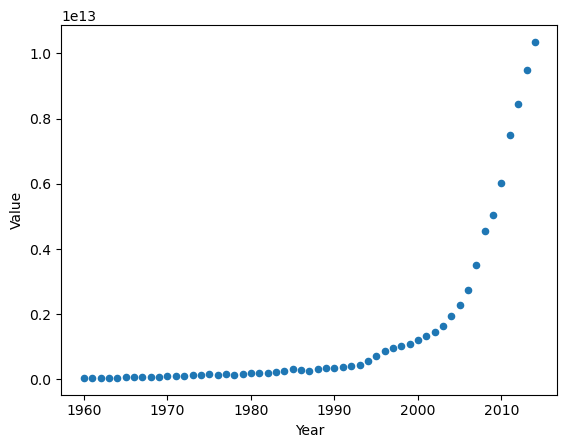

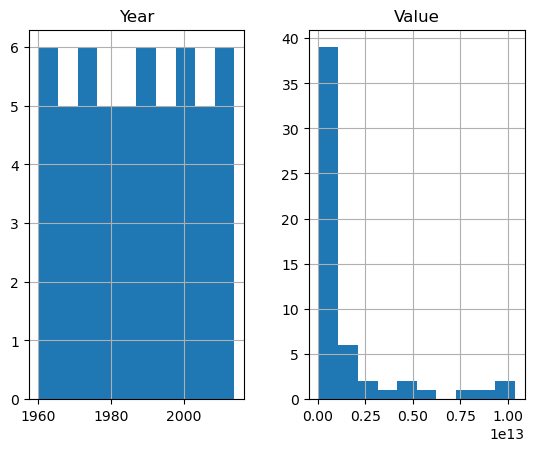

In [12]:
df_2.plot.scatter(x='Year', y='Value')
df_2.hist()

In [13]:
# statical view of the first data set
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


 we have 30 rows in the data set
 the mean of the salary is 76003.0
 the standard deviation of the salary is 27414.43
 the minimum salary is 37731.0
 the maximum salary is 122391.0
 the 25% of the salary is 56720.75
 the 50% of the salary is 65237.0
 the 75% of the salary is 100544.75
 the mean of the years of experience is 5.313333
 the standard deviation of the years of experience is 2.837888
 the minimum years of experience is 1.1
 the maximum years of experience is 10.5
 the 25% of the years of experience is 3.2
 the 50% of the years of experience is 4.7
 the 75% of the years of experience is 7.7


In [14]:
# statical view of the second data set
df_2['Value'].describe()

count    5.500000e+01
mean     1.437042e+12
std      2.500085e+12
min      4.668518e+10
25%      1.395123e+11
50%      3.074796e+11
75%      1.268748e+12
max      1.035483e+13
Name: Value, dtype: float64

 interpretation statical view of the second data set
 we have 55 rows in the data set
 the mean of the gdp is 1.437042 trillion dollars.
 the standard deviation of the gdp is 2.5 trillion dollars.
 the minimum gdp is 4.668518e+10 dollars.
 the maximum gdp is 1.035483e+13 dollars.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

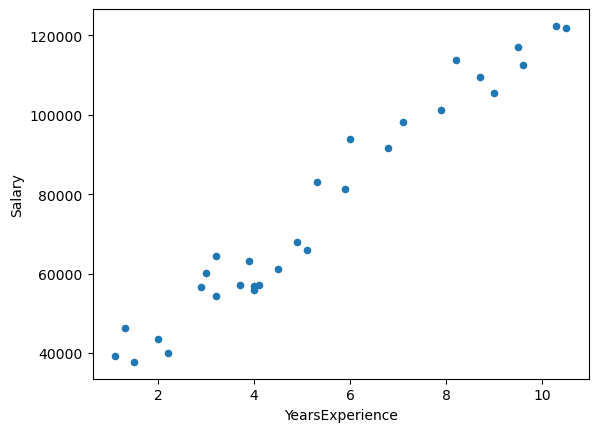

In [15]:
#the scatterplot of the first data set 'Experience / Salar
df.plot.scatter(x='YearsExperience', y='Salary')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

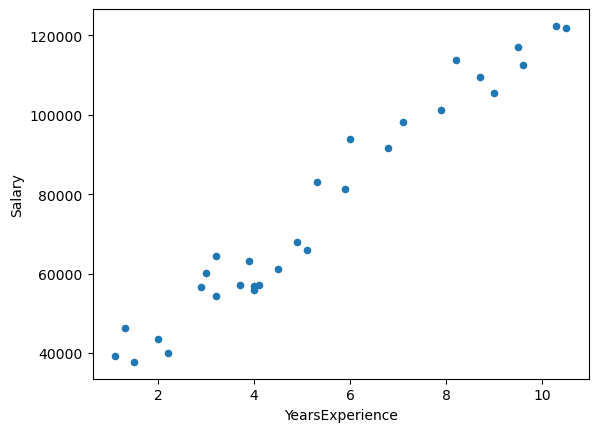

In [16]:
df.plot.scatter(x='YearsExperience', y='Salary')

array([[<Axes: xlabel='YearsExperience', ylabel='YearsExperience'>,
        <Axes: xlabel='Salary', ylabel='YearsExperience'>],
       [<Axes: xlabel='YearsExperience', ylabel='Salary'>,
        <Axes: xlabel='Salary', ylabel='Salary'>]], dtype=object)

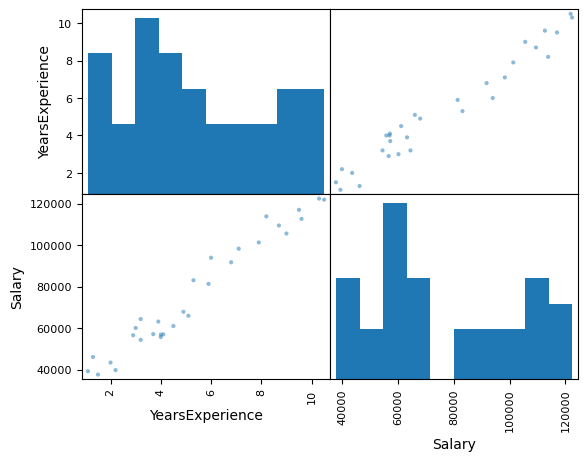

In [17]:
from pandas.plotting import scatter_matrix

# scatter matrix of the first data set
scatter_matrix(df)
# strong positive correlation between the years of experience and the salary 
# the more the years of experience the more the salary

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Value', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Value'>,
        <Axes: xlabel='Value', ylabel='Value'>]], dtype=object)

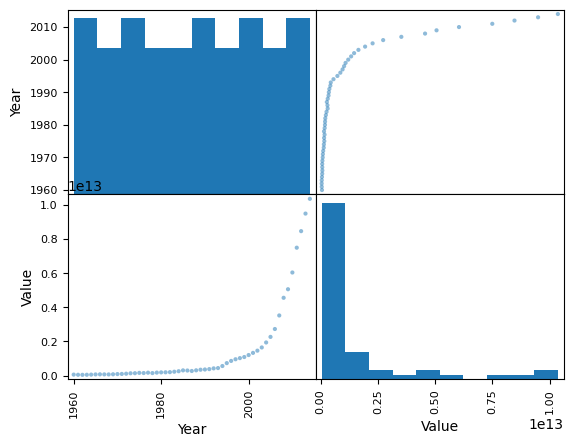

In [18]:
# scatter matrix of the first data set
scatter_matrix(df_2)
## strong positive correlation between the year and the gdp
# the more the year the more the gdp
# but the gdp is not linear

### 2. Simple Linear Regression for YearsExperience / Salary dataset

In [19]:
from sklearn.model_selection import train_test_split

X = df[['YearsExperience']]
y = df[['Salary']]
# splitting the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression

#Create and Train the Model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

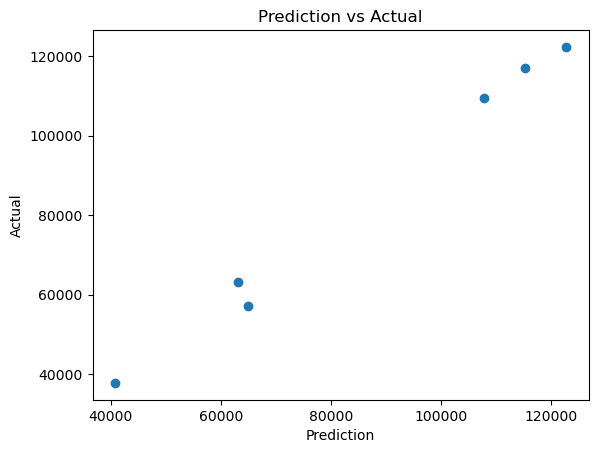

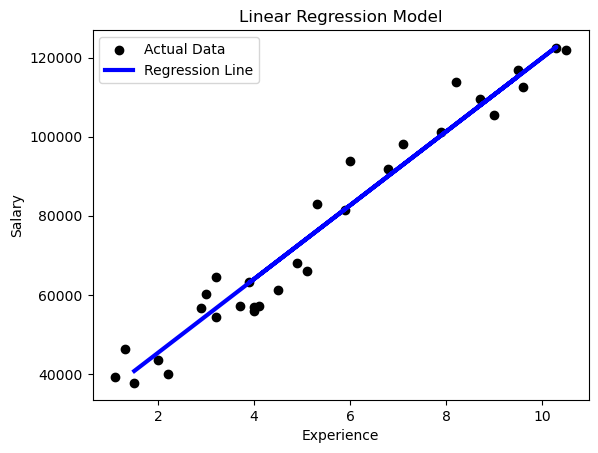

In [22]:
# Visualize the results
plt.scatter(y_pred, y_test)
plt.title("Prediction vs Actual")
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()
# Plot the scatter plot of the data
plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Actual Data')

# Plot the linear regression line
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')

# Add labels and title
plt.title('Linear Regression Model')
plt.xlabel('Experience')
plt.ylabel('Salary')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [23]:
import numpy as np
from sklearn import metrics

# the accuracy of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321345


### the accuracy of the model
Mean Absolute Error: 2446.1723690465055
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321343
the model is accurate

### 3. Multiple Linear Regression for Insurance dataset

In [24]:
df_3 = pd.read_csv('data/insurance.csv')
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df_3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

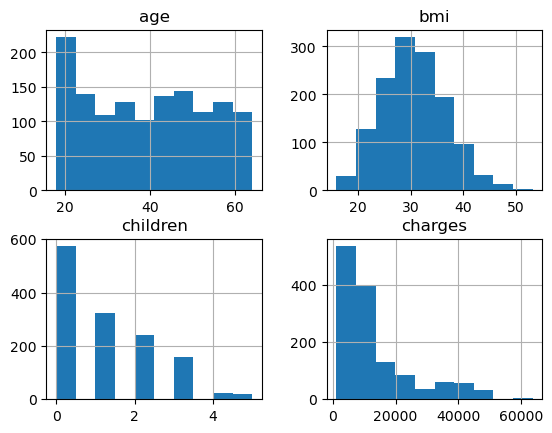

In [26]:
df_3.hist()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

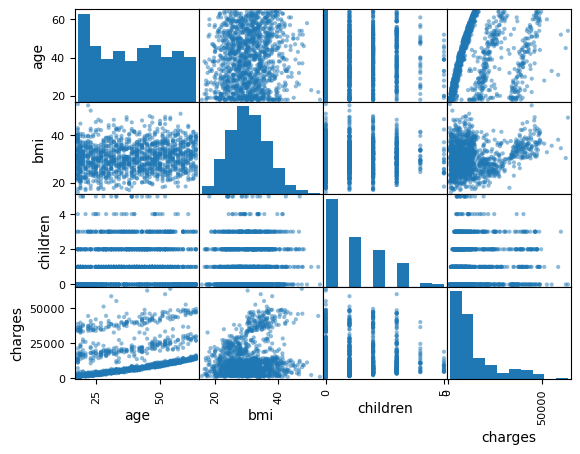

In [30]:
scatter_matrix(df_3)

In [28]:
X = df_3[['age', 'bmi', 'children', 'smoker', 'region']]
y = df_3[['charges']]

In [29]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'no'

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [ ]:
# the accuracy of the model
# the accuracy of the model
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
### 4. Polynomial Regression for China GDP dataset

In [ ]:
df_2.head()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degree = 3  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
df = pd.read_csv("data/china_gdp.csv")
X = df[['Year']].values
y = df[['Value']].values

X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
# Plot the original data
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the polynomial regression curve
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)
plt.plot(X_new, y_new, color='red', label=f'Polynomial Regression (Degree {degree})')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")